# Demonstration 1 - IFT 3700

### Topics covered :

- How the demonstrations work
- Presentation of the "Jupyter Notebook" format
- Cognitive bias:
  1. Multiple comparisons problem
  
  - Review of p-values
  - Bonferroni correction
  
  2. Regression to the mean
  3. Bayes' Theorem
- Presentation of the MNIST dataset
- Implementation of a classification method : "Naive Bayesian Classification"

## Theoretical part:

### Multiple comparisons problem

**P value:** Probability that we would observe the same result if our hypothesis was wrong. In other words, we believe we are seeing a significant result when it was actually just chance This amounts to a Type 1 error. We obviously want to avoid making these mistakes.

In summary: small value p $\\implies$ greater certainty of the veracity of our results.

The multiple comparisons problem arises when we test a **set** of hypotheses with a certain p-value. As an example, let's take a scenario where we test 30 hypotheses with a p-value of 0.05, or 5%. Let's assume that **every single one of our hypotheses is wrong**. What is the probability of observing at least one significant outcome by chance?

The probability that we have at least one significant result is the complement of the probability of observing none.

We have:

$$P(at\\ least\\ one\\ significant\\ result\\) = 1 - P(no\\ significant\\ result) $$$

$$= 1 - (0.95)\^{30}$$

$$\\approx 79%$$

So we see that it is very likely that we would get a significant result that would cause us to make a type 1 error.

*How can we solve this problem?*

### Bonferroni correction

The Bonferroni correction corrects this problem in a fairly simple way by dividing the p-value by the number of hypotheses we want to posit:

Let $n$ be the number of hypotheses, our p-value becomes $\\frac{\\alpha}{n}$ where $\\alpha$ was our original p-value.

We now notice that our original calculation is adjusted:

$$P(at\\ least\\ one\\ significant\\ result\\) = 1 - P(no\\ significant\\ result) $$$

$$ = 1 - (1 - \\frac{\\alpha}{n})\^{30}$$

$$= 1 - (1 - \\frac{0.05}{30})\^{30}$$

$$\\approx 1 - (1 - 0.00167)\^{30}$$

$$\\approx 1 - 0.9512$$

$$\\approx 5%$$

However, this correction takes into account that all hypothesis tests are *independent*. If there is a positive correlation between them, the Bonferroni correction will result in an **overly conservative**p-value. This will result in Type 2 errors, i.e. rejecting a significant result when it is **valid**.

Other more common and effective approaches exist to eliminate this problem, such as the Holm-Bonferroni method and Sidak correction. They are much less naive and more interesting. I invite you to take a look at them if you're interested.

### Regression toward the mean

In summary, it is the principle that if the value of a variable seems extreme during an initial test, it will probably be closer to the mean in the second test. This may lead us to erroneous conclusions.

The classic example is to take a class of students and have them randomly answer a test composed of 100 true or false questions, *while* *taking* *into* *account that there is no negative correction ;)*. We obviously expect the class average to be 50%. However, some students will be lucky and will have above-average grades and vice versa for the unlucky students. In short, we will have an approximately normal distribution of scores with 50% as an overall average.

If we repeat the experiment with the students who were lucky in the first exam, we will obtain a new normal distribution centered at 50%. Same scenario for the students who were less fortunate on the first test.

This gives the illusion that students who scored poorly on the first exam improved on the second and that students who scored well on the first exam did not study enough on the second. However, we know very well that this is not the case, since all students answer randomly!

This is called regression toward the mean. Obviously, the previous example is very unrealistic. In real life, these are often scenarios where several factors affect a certain outcome, not just luck. This is what leads us to form hypotheses to explain certain trends.

In short, it must be realized that the "natural tendency" of regression toward the mean can sometimes fully explain results when one could make erroneous assumptions to explain them.

I recommend that you watch a very good and fairly popular video that deals with an instance of this cognitive bias, a study that tried to determine whether positive or negative reinforcement was more effective in the training of Israeli military fighter pilots:

https://www.youtube.com/watch?v=1tSqSMOyNFE

### Bayes' Theorem

As discussed during the course with the example of a medical test for a relatively rare disease that sometimes gives false positives, Bayes' theorem is used to calculate **conditional probabilities**.

The formula is as follows:

$$P(A\|B) = \\frac{P(B\|A) \\cdot P(A)}{P(B)}$$

This formula can be obtained by combining two instances of the definition of conditional probability:

$$P(A\|B) = \\frac{P(A \\cap B)}{P(B)}$$

Likewise,

$$P(B\|A) = \\frac{P(B \\cap A)}{P(A)}$$

Since $P(B \\cap A) = P(A \\cap B)$,

$$P(A\|B)\\cdot P(B) = P(B\|A)\\cdot P(A)$$

Finally, dividing the two sides by $P(B)$ gives us:

$$P(A\|B) = \\frac{P(B\|A) \\cdot P(A)}{P(B)}$$

## Practical part :

We can already dive into the practical side now that we know Bayes' Theorem. We can implement the naive Bayes classifier using the MNIST dataset. To do so, it would be advantageous to be comfortable with Jupyter and Python 3. See the tutorials below if you are not familiar with this environment:

https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what\_is\_jupyter.html

https://docs.python.org/3/tutorial/index.html

# WARNING:

**The following exercice can be completed in full by following the document below (pages 1 to 8). If you want to complete the entire implementation by yourself (recommended), do not read the rest of this notebook. However, my biased opinion is that this notebook is much clearer and more intuitive than this document. If you want to be guided, you can follow the steps described in the rest of the notebook. A version of the notebook with the missing code will also be published on the website. If you choose to do this on your own, don't forget to go back to the notebook and read the "Conclusion" section.**

http://www-inst.eecs.berkeley.edu/~cs70/sp15/notes/n21.pdf

Let's first look at how to use the MNIST dataset for this exercise.

### MNIST dataset

The MNIST dataset is a large database of images of handwritten numbers. These images are $28 \\times $28 pixels in size. In the file *"mnist\_train.csv"* that we will use, these data are organized as a table (see CSV data format). If you open this file in Excel or a text editor, you will see that it consists of 60,001 rows and 785 columns. These columns are separated by commas, hence the name CSV (Comma Separated Values). Each line corresponds to a data point. The first column represents the label, which is the real class of the figure. The following columns represent the value of each pixel in the image. These columns are the dimensions of the dataset.

Since there are $28 times 28 = $784 pixels in the image, we have a total of 785 columns including the label. The 60,001 rows are explained by the 60,000 data and the first row containing the column identifiers. Each piece of data is actually a vector of 784 dimensions composed of integers ranging from 0 to 255 for each dimension, as well as the label of that data. These numbers represent the intensity of a grayscale pixel, with 0 being the black end of the scale and 255 being the white end.

### Importing MNIST into the Jupyter Notebook

We have to use the `csv` module to import the file *"mnist\_train.csv"*. This file is available on the course website. To simplify the path to be specified in the `open()`function, I suggest you put this file in the same directory (folder) as this notebook. Here's how to get a list of lines from the file:

In [1]:
import csv

data = open('mnist_train.csv')

csv_file = csv.reader(data)

data_points = []

for row in csv_file:
    data_points.append(row)

#On enlève la première ligne, soit les "headers" de nos colonnes
data_points.pop(0)

#Imprime la première ligne de notre training set
print(data_points[0])

data.close()

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_train.csv'

We see that the first data point of our training set is a 5, since that is the first element of this line, i.e. the label. What is the type of value '5'?

In [2]:
print(type(data_points[0][0]))

<class 'str'>


`data_points` is therefore a list of lists of strings. We want to work with ints and not strings. Here's how we can convert them. If you don't understand these nested loops, see this link: https://docs.python.org/3/tutorial/controlflow.html#for-statements

If you run the cell below, you will see that the number of data results **in a significant delay**. This is the case for **several** other cells below. The `In [*]` symbol to the left of the cell indicates that the cell is being executed.

In [3]:
for i in range(len(data_points)):
    for j in range(0,785):
            data_points[i][j] = int(data_points[i][j])

print(data_points[0])

[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253, 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 154, 253, 90, 

It will be useful to separate our label column from the rest of the data. We're going to create a $60 \\ 000 \\times 1$ dimensional vector that we’ll call `y_train`. This vector will include our labels, also called "targets", since we will try to predict these with our model. The rest of the data, a matrix of size $784 \\times 60 \\ 000$, will be named `x_train`.

In [4]:
y_train = []

for row in data_points:
    y_train.append(row[0])

x_train = []

for row in data_points:
    x_train.append(row[1:785])
    
print(x_train[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253, 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 154, 253, 90, 0, 

We are now ready to view these images. We will use `numpy` and `matplotlib`. I invite you to familiarize yourself with each of these libraries as they will be used regularly in the course. In the code below, we have to convert our `x_train` from a 1 dimensional vector to a 2 dimensional matrix.

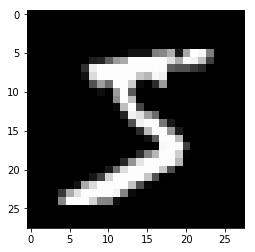

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Conversion de notre vecteur d'une dimension en 2 dimensions
matrix = np.reshape(x_train[0], (28,28))

plt.imshow(matrix, cmap='gray')

#Affiche un 5, tout comme nous avions vu comme premier "label" du jeu de données
plt.show()

To be able to implement the naive Bayes classifier in the next section, we need to transform pixel intensity values from 0 to 255 into binary values 0 and 1; you will see why ;). We can do this by using the `round()`function.

In [7]:
for i in range(len(x_train)):
    for j in range(len(x_train[0])):
        if x_train[i][j] != 0 :
            #Nous devons diviser par 255.0 et non 255 pour convertir ces int en float
            x_train[i][j] = round(int(x_train[i][j]) / 255.0)

print(x_train[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

We can use the same code as before to visualize the change:

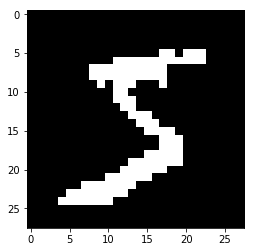

In [8]:
#Conversion de notre vecteur d'une dimension en 2 dimensions
matrix = np.reshape(x_train[0], (28,28))

plt.imshow(matrix, cmap='gray')
plt.show()

### Implementation of a naive Bayes classifier

The principle behind the naive Bayes classifier is the following: let's say we have a number of classes $n = \|C\|$ (10 in our case): $C = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}$) and $x$, a vector that represents our image. Using Bayes' theorem, we can determine **the posterior** $P(c\|x)$, which is the probability that our vector belongs to class $c$ given its representation as the vector $x$ using the following equation :

$$P(c\|x) = \\frac{P(x\|c) \\cdot P(c)}{P(x)}$$

To calculate this probability, we need:

- **The likelihood** $P(x\|c)$, which is the probability of obtaining a vector $x$ given that the vector belongs to the class $c$.
- **The prior** $P(c)$, which is the probability of having a class $c$ image in our dataset.
- **The** **evidence** $P(x)$ , the probability of having a vector $x$ in our dataset.

Once we can calculate this probability, we can do so for each class to which $x$ could belong and choose the class that generates the maximum conditional probability. We can express this with the following formula:

$$h(x) = \\operatorname\*{argmax}\_{c \\ \\in \\ C}  \\ P(c\|x)$$

We use $h(x)$ here to denote our **hypothesis function**.

Let's start by calculating **the evidence $P(x)$**, which is the probability of having a vector $x$ representing an image in our dataset **(representing any number)**. We can use the law of total probability to calculate it. This will be the sum of all the probabilities of obtaining the $x$ vector as a representation of **each of the numbers**weighted by the probability of observing that number, i.e. the **prior** $P(c)$:

$$P(x) = P(x\|c\_1) \\cdot P(c\_1) + P(x\|c\_2) \\cdot P(c\_2) + \\dots + P(x\|c\_n) \\cdot P(c\_n)$$ $$= \\sum\_{j=1}\^n P(x\|c\_j)P(c\_j)$$

As mentioned above, our scenario implies that $n = 10$. We can substitute $P(x)$ in our hypothesis function. We get:

$$h(x) = \\operatorname\*{argmax}_{c \\ \\in \\ C}  \\ P(c\|x) = \\operatorname\*{argmax}_{c \\ \\in \\ C}  \\ \\frac{P(x\|c) \\cdot P(c)}{\\sum\_{j=1}\^n P(x\|c\_j)P(c\_j)}$$

We observe that **whatever** the class for which we calculate $P(c\|x)$ for a vector $x$, the denominator always remains the same since it is calculated in the same way. It is then important to understand that if a value $V\_1$ is greater than $V\_2$, and that we divide the two values by a **positive** constant $c$, the inequality $\\frac{V\_1}{c} > \\frac{V\_2}{c}$ is always satisfied. This is the case here since the denominator is a probability, which implies that it can never be negative. Therefore, **we do not need to calculate the evidence $P(x)$ in our hypothesis function** since it will have no impact on the maximum value of $P(x\|c) \\cdot P(c)$. So our hypothesis function becomes:

$$h(x) = \\operatorname\*{argmax}_{c \\ \\in \\ C}  \\ P(c\|x) = \\operatorname\*{argmax}_{c \\ \\in \\ C}  \\ P(x\|c) \\cdot P(c)$$

Perfect! One less term to calculate. Let's continue by calculating the **prior** $P(c)$, which is the probability of having an image which belons to class $c$ in our dataset. To calculate this probability for a particular class, simply count the number of data with the label of that class and divide it by the total number of data :

$$P(c) = \\frac{# data\\ in \\ class \\ c}{# total \\ data}$$

Since we have $10$ classes in our implementation, we need to browse `y_train` by setting 10 counters, one for each class. In the cell below, declare a list `counts` and assign 10 null values to it.

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


We can now count the number of instances of each label. Browse `y_train` and assign the appropriate values to `counts` : `counts[0]` will be the number of zeros in `y_train`, `counts[1]` the number of 1s, and so on. Then print the result.

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


You should have obtained `[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]`. We now want to get a list `priors` that will give us the probability of an image belonging to each class in our dataset.

We get `[0.09871666666666666, 0.11236666666666667, 0.0993, 0.10218333333333333, 0.09736666666666667, 0.09035, 0.09863333333333334, 0.10441666666666667, 0.09751666666666667, 0.09915]`.

Now that we have calculated $P(c)$, which is the prior of each class, all that remains is to calculate **the likelihood** $P(x\|c)$. It's a little more complicated than the prior. Since our vector $x$ is actually $(x\_1, x\_2, ... x\_{784})$, we seek to determine $P(x\_1, x\_2, ... x\_{784}\|c)$. We must use the multivariate probability law which is as follows:

$$P(A\_1, \\dots, A\_n) = P(A\_1) \\times P(A\_2\|A\_1) \\times P(A\_3\|A\_1, A\_2) \\times \\dots \\times P(A\_n\|A\_1, A\_2, \\dots, A\_{n-1})$$

So we have:

$$P(x\_1, x\_2, ... x\_{784}\|c) = P(x\_1\|c) \\times P(x\_2\|c, x\_1) \\times P(x\_3\|c, x\_1, x\_2) \\times \\dots \\times P(x\_{784}\|c, x\_1, x\_2, x\_3, \\dots, x\_{783})$$

If we make the **naive** hypothesis that these probabilities are **independent**, we have by definition that each term $P(x\_i\|c, x\_1, x\_2, \\dots, x\_{i-1})$ becomes $P(x\_i\|c)$. Assuming that these probabilities are independent is to assume that there is no correlation between the pixels, which is not the case. There are other versions of the Bayesian classifier that take these correlations into account, see the section **"for maniacs"** in the conclusion. However, let's see what results we can obtain with this "wild assumption".

We have:

$$P(x\_i\|c, x\_1, x\_2, \\dots, x\_{i-1}) = P(x\_i\|c)$$

$$\\implies P(x\_1, x\_2, ... x\_{784}\|c) = P(x\_1\|c) \\times P(x\_2\|c) \\times P(x\_3\|c) \\times \\dots \\times P(x\_{784}\|c)$$

We need to calculate ten different $P(x\|c\_j)$, a likelihood for each class $j, 0 \\leq j \\leq $9. We want to determine:

$$P(x\_{j1}, x\_{j2}, ... x\_{j \\ 784}\|c\_j) = P(x\_{j1}\|c\_j) \\times P(x\_{j2}\|c\_j) \\times P(x\_{j3}\|c\_j) \\times \\dots \\times P(x\_{j784}\|c\_j)$$

$$= \\prod\_{i = 1}\^{784} P(x\_{ji}\|c\_j) $$

How to calculate $P(x\_{ji}\|c\_j)$?

**Since we have rounded each pixel $x\_i$ to a binary value**, we can model $P(x\_{ji}\|c\_j)$ with a binomial distribution where the number $n$ of Bernoulli trials is 1. A binomial distribution where $n = $1 is also called a Bernoulli distribution. If you are not familiar with binomial distributions, I strongly recommend you take a look at it since it is an important topic.

Let's define the probability that a pixel $i$ of class $j$ is a $1$ as follows:

$$P(x\_{ji} = 1) = p\_{ji}$$

The probability that it is a $0$ is therefore the complement of $p\_{ji}$. We have:

$$P(x\_{ji} = 0) = (1 - p\_{ji})$$

According to the binomial distribution, we have:

$$P(x\_{ji}\|c\_j) = p\_{ji}^{x\_i}(1 - p\_{ji})^{1-x\_i}$$

Now that we know how to calculate the likelihood, we just have to calculate $p\_{ji}$ for all $j$ classes and $i$ pixels. It's a simple enough calculation:

$$p\_{ji} = \\frac{# pixels \\ i \\ equal \\ to\\ 1 \\ for\\ the\\ data\\ of\\ class\\ j}{# total \\ data\\ in\\ class \\ j}$$

**However, there is a problem with the previous formula, namely the fact that $p\_{ji}$ can be zero.** This would happen if we were to **never** see a value of 1 for a pixel $i$ among all the images of a class $j$ in our test set. *Why is that a problem?*

Let us remember that we have just demonstrated that:

$$P(x\|c\_j) = \\prod\_{i = 1}^{784} P(x\_{ji}\|c\_j) = \\prod\_{i = 1}^{784} p\_{ji}^{x\_i}(1 - p\_{ji})^{1 - x\_i}$$

If even **one** of the $p\_{ij}$ values  is null, **our entire product will be nullified**. Suppose we have a pixel $k$ that is always black in the images of our training set (a pixel in a corner, for example). We'll have:

$$p\_{jk} = 0 \\implies \\prod\_{i = 1}^{784} p\_{ji}^{x\_i}(1 - p\_{ji})\^{1 - x\_i} = 0$$

This regardless of the values of $p\_{j1}, p\_{j2}, \\dots, p\_{j \\ k-1}, p\_{j \\ k+1}, \\dots, p\_{j \\ 784}$ which can be very good probabilities. To remedy this problem, we use **Laplace smoothing.** We adjust the formula as follows:

$$p\_{ji} = \\frac{# (\\ pixels \\ i \\ equal \\ to \\ 1 \\ for \\ data \\ in \\ class \\ j \\ )\\ + 1}{# (\\ total \\ data \\ in \\ class \\ j \\ ) \\ + 2}$$

This makes $p\_{ji}$ **strictly** greater than 0 and less than 1. We add 2 to the denominator since we are working with a **binomial distribution**. This technique is also known as **additive smoothing**. Laplace smoothing is also used in bag-of-words modelling in natural language processing. For more information, see :

https://en.wikipedia.org/wiki/Additive\_smoothing

https://www.youtube.com/watch?v=k\_TiEHh3RI0

Let's start by calculating $p\_{ji}$ :

In the next cell, initialize a list `sum_pixel_values` which will be a 2-dimensional matrix (list of lists) containing the sum of all pixel values $x\_{ji}$ in `x_train`. Specifically, `sum_pixel_values` will have a dimension of $10 \\times 784$. Then calculate these values. **Reminder:** $j$ is the $j\^{th}$ class ($0 \\leq j \\leq 9$) and $i$ is the $i\^{th}$ pixel ($0 \\leq j \< 784$).

**Warning!** We previously used the $j$ index ranging from $1$ to $784$ in the explanation. It is simpler to start from scratch in the implementation to avoid an index management issue.

We can now calculate $p\_{ji}$. Initialize a new list `pixel_probability` with the same dimensions as `sum_pixel_values` and calculate each $p\_{ji}$ by using laplace smoothing as explained above. *Hint* : We have already calculated the two variables in this equation.

It would now be interesting to visualize what we have just calculated. Using the code used above for displaying vectors from `x_train`, display the pixel probabilities for each class.

In summary, our $h(x)$ **hypothesis function** required two ingredients:

$$h(x) = \\operatorname\*{argmax}\_{c \\ \\in \\ C}  \\ P(x\|c) \\cdot P(c)$$

P(c) is **the prior**, which we first calculated for each class. $P(x\|c)$ is **the likelihood ******where********:

$$P(x\|c\_j) = \\prod\_{i = 1}^{784} p\_{ji}^{x\_i}(1 - p\_{ji})\^{1-x\_i}$$

We then generated the matrix `pixel_probability` which contains each of the $p\_{ji}$ values.

Placing the latter in the first equation, we have:

$$h(x) = \\operatorname\*{argmax}_{c \\ \\in \\ C}  \\ P(c\_j) \\cdot \\prod_{i = 1}^{784} p\_{ji}^{x\_i}(1 - p\_{ji})\^{1-x\_i}$$

We only have one adjustment left to make to $h(x)$. A product with a high number of small probabilities is problematic. It could be that this product is such a small result that a computer has difficulty representing them on its processor, a problem called arithmetic underflow. To remedy this, we can calculate the logarithm of these values. Similar to the fact that **we didn't have to compute the evidence** earlier in our objective function since $V\_1 > V\_2 \\implies \\frac{V\_1}{c} > \\frac{V\_2}{c}$ for a positive constant $c$, taking the logarithm of $P(c\_j) \\cdot \\prod\_{i = 1}{784}^p\_{ji}{x\_i}^{x\_i}(1 - p\_{ji})\^{x\_i}$ does not change its maximum value because the logarithm is a **monotonically increasing function**. Note that the direction of variation of a monotonic function is constant. So we have:

$$h(x) = \\operatorname\*{argmax}_{c \\ \\in \\ C}  \\ \\log(P(c\_j) \\cdot \\prod_{i = 1}^{784} p\_{ji}^{x\_i}(1 - p\_{ji})^{1-x\_i}) = \\operatorname\*{argmax}_{c \\ \\in \\ C}  \\ \\log(P(c\_j)) + \\log(\\prod_{i = 1}^{784} p\_{ji}^{x\_i}(1 - p\_{ji})^{1-x\_i})$$

$$= \\operatorname\*{argmax}_{c \\ \\in \\ C}  \\ \\log(P(c\_j)) + \\sum_{i = 1}^{784} \\log(p\_{ji}^{x\_i}(1 - p\_{ji})\^{1-x\_i})$$

$$= \\operatorname\*{argmax}_{c \\ \\in \\ C}  \\ \\log(P(c\_j)) + \\sum_{i = 1}\^{784} (x\_i \\cdot \\log(p\_{ji})+(1-x\_i)\\cdot \\log(1 - p\_{ji}))$$

We have the final form of our hypothesis function $h(x)$. Declare in the following cell a function `hypothesis()` that takes as argument a vector $x$ and returns $h(x)$.

We can now classify our test set. Import the *mnist\_test.csv* file and create the lists `x_test`and `y_test` as we did before for the training set.

We can **finally** classify our training set. Just iterate our hypothesis function on the 10,000 vectors composing `x_test` by comparing the result with the corresponding value of `y_test` . It is useful to accumulate the error index in a list called `misclassifications`. That said, we will have to be **patient**.

Then calculate our **error rate**, which is the percentage of errors obtained when classifying our "training set".

It is interesting to see **which images** our classifier has not classified correctly. Visualize one of the errors $x$ and compare it to $h(x)$. Is this an understandable mistake?

# Conclusion

We have just completed this implementation of the naive Bayes classifier. Some relevant questions arise in relation to this exercise:

1. If we hadn't rounded each pixel to a binary value, what **distribution** would we have used to model $P(x\_{ji} = k), \\ 0 \\leq k \\leq 255?$ What **problem** would we have had if we had decided to include these probabilities in our model?

2. Was the **Laplace smoothing** really necessary? What would have happened if we had not taken the smoothing into account? Is our $h(x)$ still valid? Also, what error rate indicates a model that doesn't work? Is it 100%?

3. As mentioned earlier, calculating $\\log(h(x))$ is equivalent to calculating $h(x)$ since $\\log(x)$ is a **monotonically increasing** function. Could we use a **monotonically decreasing** function $f(x)$ to compute $f(h(x))$ and get the same result, or should we make a modification to our $h(x)$?

### For maniacs

This model uses the **naive** assumption that there is no correlation between the pixels in our images. There is a Gaussian variant of the Bayes classifier that takes this into account. The next step in this exercise would be to implement it. A word of encouragement: it reduces the error rate to less than 5%. See pages 8 to 14: http://www-inst.eecs.berkeley.edu/~cs70/sp15/notes/n21.pdf

Cheers!

Arnaud